In [ ]:
# !pip install lifelines

In [1]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('rainbow')

In [2]:
# Loading the the survival un-employment data
df = pd.read_csv("survival_unemployment.csv")

In [3]:
df.head()

,spell,event,ui,logwage,age
0,5,1,0,6.89568,41
1,13,1,1,5.28827,30
2,21,1,1,6.76734,36
3,3,1,1,5.97889,26
4,9,0,1,6.31536,22


In [4]:
df.describe()

,spell,event,ui,logwage,age
count,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000
mean,6.247981,0.320969,0.552797,5.692994,35.443314
std,5.611271,0.466919,0.497279,0.535659,10.640204
min,1.000000,0.000000,0.000000,2.708050,20.000000
25%,2.000000,0.000000,0.000000,5.298320,27.000000
50%,5.000000,0.000000,1.000000,5.676750,34.000000
75%,9.000000,1.000000,1.000000,6.052090,43.000000
max,28.000000,1.000000,1.000000,7.600400,61.000000


In [5]:
# Spell is referring to time 
Time = df.spell
Time

0        5
1       13
2       21
3        3
4        9
        ..
3338    11
3339     4
3340     5
3341     1
3342     8
Name: spell, Length: 3343, dtype: int64

In [6]:
# Initiating the KaplanMeierFitter model
kmf = KaplanMeierFitter()

<Axes: xlabel='timeline'>

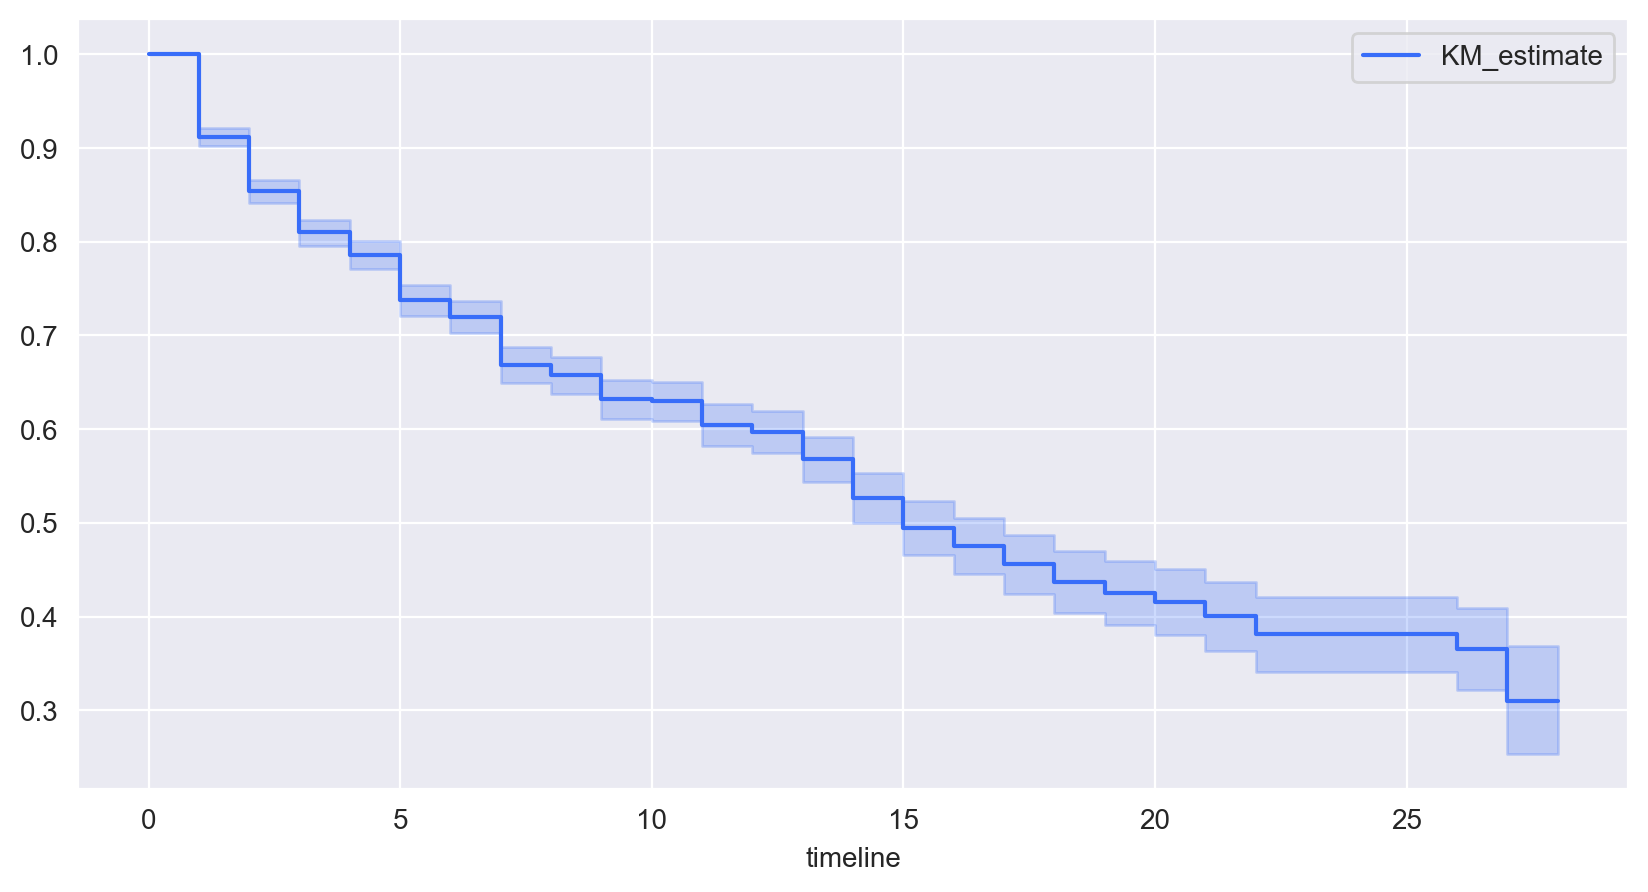

In [7]:
# Fitting KaplanMeierFitter model on Time and Events for death 
kmf.fit(Time,event_observed=df.event)
# Time-line estimations plot 
kmf.plot()

In [8]:
# Over Multiple groups 
# For each group, here group is ui
df.ui.value_counts()

ui
1    1848
0    1495
Name: count, dtype: int64

In [9]:
df[df.ui==1]

,spell,event,ui,logwage,age
1,13,1,1,5.28827,30
2,21,1,1,6.76734,36
3,3,1,1,5.97889,26
4,9,0,1,6.31536,22
5,11,0,1,6.85435,43
...,...,...,...,...,...
3337,5,0,1,5.57215,40
3338,11,0,1,5.69373,41
3339,4,0,1,5.92959,27
3340,5,0,1,5.80513,30


<Axes: xlabel='timeline'>

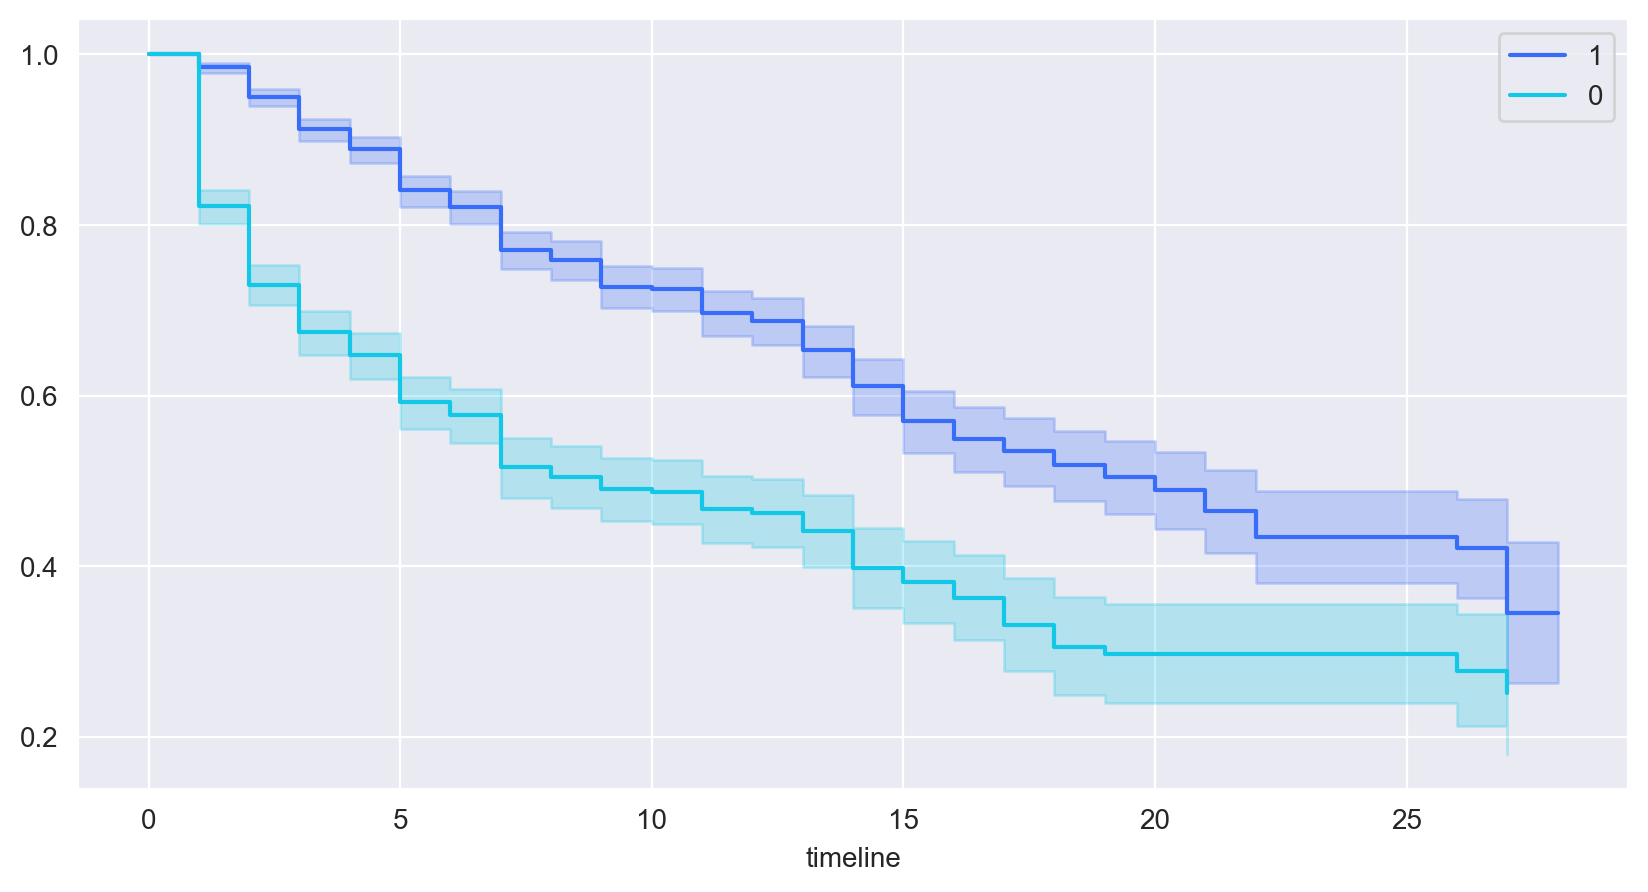

In [10]:
# Applying KaplanMeierFitter model on Time and Events for the group "1"
kmf.fit(Time[df.ui==1], df.event[df.ui==1], label='1')
kmf.plot()

# Applying KaplanMeierFitter model on Time and Events for the group "0"
kmf.fit(Time[df.ui==0], df.event[df.ui==0], label='0')
kmf.plot()